# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Final Project Group 40: Trump Tweets and Market Volatility


**Harvard University**<br/>
**Fall 2019**<br/>
**Group**: Dylan DeMarco, Daiki Ina, Roger Zhang, Jerry Huang

<hr style="height:2pt">

In [3]:
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [4]:
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

import pandas_profiling

## DWJ and VIX comparison

In [29]:
"""
Sourced from the creators of vix (trustworthy source IMO) -- cboe
http://www.cboe.com/products/vix-index-volatility/vix-options-and-futures/vix-index/vix-historical-data
download 2004 -> present and subset the csv below.
VIX Open, VIX High, VIX Low, VIX close have to be converted into float object
"""
vix_full = pd.read_csv('./data/vix_scraped_11_08_2019.csv')
vix_full = vix_full.rename(columns=vix_full.iloc[0]).drop(vix_full.index[0])
vix_full.Date = pd.to_datetime(vix_full.Date)

vix_election_to_present = vix_full[vix_full['Date'] >= pd.Timestamp('11/09/2016')]
vix_election_to_present.to_csv('./data/raw/vix_data.csv')

In [30]:
vix_election_to_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 3238 to 3991
Data columns (total 5 columns):
Date         754 non-null datetime64[ns]
VIX Open     754 non-null object
VIX High     754 non-null object
VIX Low      754 non-null object
VIX Close    754 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 35.3+ KB


In [31]:
vix_election_to_present['VIX Open'] = vix_election_to_present['VIX Open'].astype(float)

C:\Users\Daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
vix_election_to_present['m_y']= pd.to_datetime(vix_election_to_present.Date).dt.to_period('M')

C:\Users\Daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
vix_election_to_present.corr()

,VIX Open,VIX High,VIX Low,VIX Close,VIX Range,VIX Change
VIX Open,1.000000,0.961973,0.977351,0.943093,0.616517,-0.170310
VIX High,0.961973,1.000000,0.945700,0.975007,0.777008,0.037011
VIX Low,0.977351,0.945700,1.000000,0.958102,0.530206,-0.058680
VIX Close,0.943093,0.975007,0.958102,1.000000,0.687795,0.167052
VIX Range,0.616517,0.777008,0.530206,0.687795,1.000000,0.210187
VIX Change,-0.170310,0.037011,-0.058680,0.167052,0.210187,1.000000


In [14]:
vix_open = vix_election_to_present['VIX Open']
vix_open

3238    20.70
3239    14.01
3240    14.83
3241    14.69
3242    14.16
        ...  
3987    12.99
3988    12.68
3989    12.85
3990    13.18
3991    12.59
Name: VIX Open, Length: 754, dtype: float64

# Load the Dow Jones data

In [15]:
dwj_election_to_present = pd.read_csv('./data/DJI.csv', header = 0)
# look at the raw dara
dwj_election_to_present.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-09,18317.259766,18650.060547,18252.550781,18589.689453,18589.689453,173110000
1,2016-11-10,18603.140625,18873.660156,18603.140625,18807.880859,18807.880859,164390000
2,2016-11-11,18781.650391,18855.779297,18736.960938,18847.660156,18847.660156,107300000
3,2016-11-14,18876.769531,18934.050781,18815.750000,18868.689453,18868.689453,112250000
4,2016-11-15,18858.210938,18925.259766,18806.060547,18923.060547,18923.060547,100660000


In [16]:
# rename and get the correspodning variable for DWJ
dwj_election_to_present.rename(columns={'Open':'DWJ Open', 'High':'DWJ High', 'Low':'DWJ Low', 'Close':'DWJ Close'}, inplace=True)
dwj_election_to_present = dwj_election_to_present.iloc[:,0:5]
dwj_election_to_present['DWJ Open'] = dwj_election_to_present['DWJ Open'].astype(float)
dwj_election_to_present['DWJ High'] = dwj_election_to_present['DWJ High'].astype(float)
dwj_election_to_present['DWJ Low'] = dwj_election_to_present['DWJ Low'].astype(float)
dwj_election_to_present['DWJ Close'] = dwj_election_to_present['DWJ Close'].astype(float)
dwj_election_to_present['DWJ Range'] = dwj_election_to_present['DWJ High'] - dwj_election_to_present['DWJ Low']
dwj_election_to_present['DWJ Change'] = dwj_election_to_present['DWJ Close'] - dwj_election_to_present['DWJ Open']

dwj_election_to_present.corr()

,DWJ Open,DWJ High,DWJ Low,DWJ Close,DWJ Range,DWJ Change
DWJ Open,1.000000,0.998954,0.997978,0.997170,0.297446,-0.074763
DWJ High,0.998954,1.000000,0.997382,0.998324,0.319265,-0.045552
DWJ Low,0.997978,0.997382,1.000000,0.998651,0.249903,-0.028227
DWJ Close,0.997170,0.998324,0.998651,1.000000,0.280186,0.000411
DWJ Range,0.297446,0.319265,0.249903,0.280186,1.000000,-0.240031
DWJ Change,-0.074763,-0.045552,-0.028227,0.000411,-0.240031,1.000000


DWJ has higher correlations than VIX among Open, High, Low, and Close values 

# Examine the VIX Open variable

In [17]:
# correlation between VIX open and DWJ variables

for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Open'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Open and {} is {}'.format(column, correlation))


The correlation between VIX Open and DWJ Open is 0.29281610873794783
The correlation between VIX Open and DWJ High is 0.3164487278215938
The correlation between VIX Open and DWJ Low is 0.26748131865250174
The correlation between VIX Open and DWJ Close is 0.2949194703411257
The correlation between VIX Open and DWJ Range is 0.7319134263769351
The correlation between VIX Open and DWJ Change is 0.017000663957385018


In [197]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX High'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX High and {} is {}'.format(column, correlation))

The correlation between VIX High and DWJ Open is 0.28818738111272263
The correlation between VIX High and DWJ High is 0.30895080153158344
The correlation between VIX High and DWJ Low is 0.25205232369329983
The correlation between VIX High and DWJ Close is 0.2797602663792978
The correlation between VIX High and DWJ Range is 0.8337169454851409
The correlation between VIX High and DWJ Change is -0.1225178043025567


In [186]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Low'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Low and {} is {}'.format(column, correlation))

The correlation between VIX Low and DWJ Open is 0.3194088798965943
The correlation between VIX Low and DWJ High is 0.33889445355237385
The correlation between VIX Low and DWJ Low is 0.29192900393512056
The correlation between VIX Low and DWJ Close is 0.3157933460427876
The correlation between VIX Low and DWJ Range is 0.7120729388721283
The correlation between VIX Low and DWJ Change is 0.05985268916011022


In [187]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Close'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Close and {} is {}'.format(column, correlation))

The correlation between VIX Close and DWJ Open is 0.31205047958228604
The correlation between VIX Close and DWJ High is 0.32932851826024356
The correlation between VIX Close and DWJ Low is 0.27442243417340695
The correlation between VIX Close and DWJ Close is 0.295721383325361
The correlation between VIX Close and DWJ Range is 0.8134125286358099
The correlation between VIX Close and DWJ Change is 0.2282290051485141


In [198]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Range'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Range and {} is {}'.format(column, correlation))

The correlation between VIX Range and DWJ Open is 0.13315288542448037
The correlation between VIX Range and DWJ High is 0.14957749020443972
The correlation between VIX Range and DWJ Low is 0.09211354584523232
The correlation between VIX Range and DWJ Close is 0.11817278649536524
The correlation between VIX Range and DWJ Range is 0.7957131143242879
The correlation between VIX Range and DWJ Change is -0.20367387389272543


In [200]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Change'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Change and {} is {}'.format(column, correlation))

The correlation between VIX Change and DWJ Open is 0.056506779663225544
The correlation between VIX Change and DWJ High is 0.03763641845123222
The correlation between VIX Change and DWJ Low is 0.020120271013511902
The correlation between VIX Change and DWJ Close is 0.001881764135607824
The correlation between VIX Change and DWJ Range is 0.24028148584203277
The correlation between VIX Change and DWJ Change is -0.7267253827379618


# Comparioson between VIX Open and DWJ open 

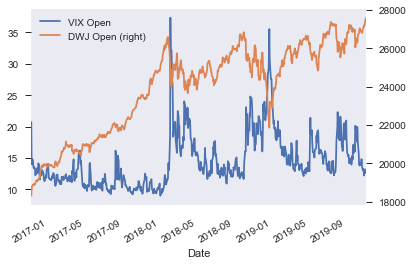

In [26]:
vix_open = vix_election_to_present['VIX Open'].values
dwj_open = dwj_election_to_present['DWJ Open'].values
date = vix_election_to_present['Date'].values
m_y = vix_election_to_present['m_y'].values
d = {'VIX Open': vix_open, 'DWJ Open': dwj_open, 'Date': date}
df = pd.DataFrame(data=d)
df.set_index("Date",drop=True,inplace=True)
df.plot(secondary_y=['DWJ Open'],grid=False, use_index=True)
plt.show()

# Comparioson between VIX Open and DWJ Range 

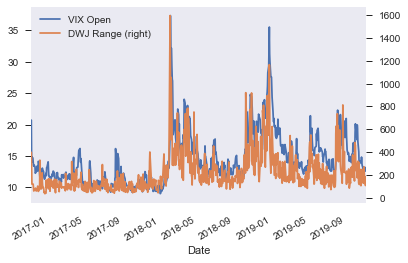

In [27]:
vix_open = vix_election_to_present['VIX Open'].values
dwj_range = dwj_election_to_present['DWJ Range'].values
date = vix_election_to_present['Date'].values
m_y = vix_election_to_present['m_y'].values
d = {'VIX Open': vix_open, 'DWJ Range': dwj_range, 'Date': date}
df = pd.DataFrame(data=d)
df.set_index("Date",drop=True,inplace=True)
df.plot(secondary_y=['DWJ Range'],grid=False, use_index=True)
plt.show()

There is little correlation between VIX open and the DWJ variables (Left Graph) (Open, High, Low, Close). The correlation coefficient is  0.29, 0.32, 0.27, and  0.29 respectively. The DWJ range (DWJ High - DWJ Low) (Right Graph), however, shows a strong correlation with VIX open. 
The basic DWJ variables (Open, High, Low, Close) tell us only about the strength of the US economy. As the US economy keeps growing, the general trend of DWJ variables is just a rise. On the other hand, the DWJ range is the slope of economic growth, which tells us how sharply the US economy changes each day. This is exactly the same as volatility. This is why the DWJ range and VIX open are highly correlated.
